In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [56]:
df = pd.read_csv("data\cleaned_bouts_new.csv")
df.head()

,winner,pass_stat_f1,pass_stat_f2,str_stat_f1,str_stat_f2,sub_stat_f1,sub_stat_f2,td_stat_f1,td_stat_f2
0,TJ Dillashaw,0,0,45,17,0,0,0,0
1,Henry Cejudo,2,0,51,81,0,0,3,1
2,Renato Moicano,4,0,17,20,1,0,1,0
3,JJ Aldrich,1,1,40,46,0,0,0,1
4,Thiago Santos,8,2,69,31,1,1,3,0


In [57]:
df_num = df.select_dtypes(include=[np.float, np.int])

In [58]:
df.describe(include=['O'])

,winner
count,5246
unique,1328
top,Donald Cerrone
freq,23


In [59]:
objecttypes = list(df.select_dtypes(include=['O']).columns)
for col in objecttypes:
    df[col] = df[col].astype('category')

In [60]:
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5246 entries, 0 to 5245
Data columns (total 9 columns):
winner          5246 non-null int16
pass_stat_f1    5246 non-null int64
pass_stat_f2    5246 non-null int64
str_stat_f1     5246 non-null int64
str_stat_f2     5246 non-null int64
sub_stat_f1     5246 non-null int64
sub_stat_f2     5246 non-null int64
td_stat_f1      5246 non-null int64
td_stat_f2      5246 non-null int64
dtypes: int16(1), int64(8)
memory usage: 338.2 KB


,winner,pass_stat_f1,pass_stat_f2,str_stat_f1,str_stat_f2,sub_stat_f1,sub_stat_f2,td_stat_f1,td_stat_f2
5241,299,0,0,24,38,0,0,0,0
5242,338,5,0,46,18,0,1,3,0
5243,581,2,0,15,5,1,0,1,0
5244,500,0,0,119,105,0,0,0,0
5245,542,1,0,24,16,1,0,2,1


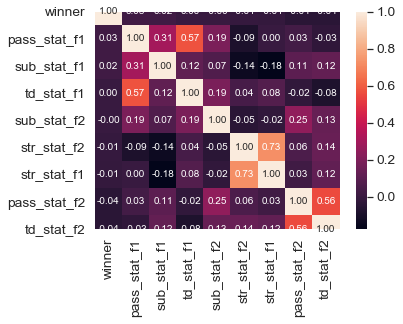

In [61]:
import seaborn as sns

k = 10 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [62]:
# scrapped data again combined fight, bouts, and kaggle datasets. randomly changed winners to red or blue in reference to corners. Converted % to fractions

df2 = pd.read_csv('data/new_preprocessed_data.csv')
df2.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,B_Stance_OpenStance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_OpenStance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,1.0,0.0,18.250000,11.416667,8.083333,5.250000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,3,0.0,1.0,0.0,5.000000,0.000000,9.000000,8.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,3,0.0,1.0,0.0,6.000000,2.625000,5.000000,2.125000,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,3,1.0,0.0,0.0,15.000000,7.000000,9.000000,7.000000,...,0,1,0,0,0,0,0,0,1,0
4,Blue,False,3,0.0,1.0,0.0,10.454545,7.363636,15.272727,11.636364,...,0,0,0,1,0,0,1,0,0,0


In [63]:
df_num = df2.select_dtypes(include=[np.float, np.int])

In [65]:
scaler = StandardScaler()

df2[list(df_num.columns)] = scaler.fit_transform(df2[list(df_num.columns)])

In [66]:
y = df2['Winner']
X = df2.drop(columns = 'Winner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

In [67]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [68]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=43, verbose=0,
                       warm_start=False)

In [69]:
model.oob_score_

0.6843076923076923

In [70]:
y_preds = model.predict(X_test)

In [71]:
accuracy_score(y_test, y_preds)

0.7354085603112841

In [72]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [73]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('R_age', 0.021375808867572243),
 ('B_age', 0.016982579437567626),
 ('B_Reach_cms', 0.01569425293168177),
 ('R_avg_opp_HEAD_landed', 0.014066353263128674),
 ('R_avg_opp_DISTANCE_landed', 0.013759015250146259),
 ('R_Reach_cms', 0.013490163235022296),
 ('R_Height_cms', 0.012936090572631596),
 ('R_avg_opp_SIG_STR_pct', 0.012796539477316599),
 ('B_Height_cms', 0.012641668625682619),
 ('R_avg_opp_SIG_STR_landed', 0.012574830517968582),
 ('B_avg_DISTANCE_att', 0.012079982194208916),
 ('R_avg_opp_HEAD_att', 0.011337009608781975),
 ('R_avg_TOTAL_STR_landed', 0.010816314666604331),
 ('R_avg_opp_DISTANCE_att', 0.010550358063070753),
 ('B_Weight_lbs', 0.01054913720253092),
 ('R_Weight_lbs', 0.010434911458753252),
 ('R_avg_opp_SIG_STR_att', 0.010157309239129735),
 ('R_avg_opp_TOTAL_STR_landed', 0.01007367910473916),
 ('R_avg_opp_TOTAL_STR_att', 0.010058440848886041),
 ('R_avg_opp_BODY_att', 0.01000244439111591),
 ('R_avg_BODY_att', 0.009903017480128031),
 ('R_avg_SIG_STR_pct', 0.00987677583195667

In [74]:
y_train.value_counts()

Red     3327
Blue    1548
Name: Winner, dtype: int64

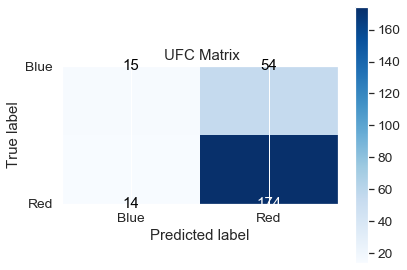

In [78]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=' UFC Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax